In [3]:
import sksurv
import os
import pandas as pd

In [4]:
os.chdir('C:\\Users\\v8307436\\Downloads\\ProjectDataset')

In [5]:
dt=pd.read_excel('selected genes LUAD.xlsx')


In [17]:
dt=dt.set_index(dt.columns[0])

In [7]:
c=pd.read_excel('cox Luad.xlsx')

In [14]:
result=c.to_records(index=False)

In [12]:
c['Patient\'s Vital Status' ]=c['Patient\'s Vital Status' ].astype('bool')

In [27]:
print(c.columns)

Index(['Patient's Vital Status', 'Survival '], dtype='object')


In [18]:
from sksurv.linear_model import CoxPHSurvivalAnalysis
estimator = CoxPHSurvivalAnalysis()
estimator.fit(dt, result)


CoxPHSurvivalAnalysis(alpha=0, n_iter=100, tol=1e-09, verbose=0)

In [19]:
pd.Series(estimator.coef_, index=dt.columns)

ABCD2                                                                0.057516
ABLIM1                                                               1.004436
ABRA                                                                 0.491482
ACD                                                                 -1.760880
ACOT13                                                              -0.559188
ACOT8                                                               -0.702629
ACSM5                                                                0.386141
ADAMDEC1                                                             0.395422
ADRA1D                                                              -0.207290
AGBL4                                                               -0.343222
AKAP11                                                              -0.472190
ALDH8A1                                                             -0.083640
ALKBH4                                                          

In [28]:
from sksurv.metrics import concordance_index_censored

prediction = estimator.predict(dt)
result = concordance_index_censored(c['Patient\'s Vital Status'], c['Survival '], prediction)
result[0]

0.9629534219016426

Text(0.5,0,'time $t$')

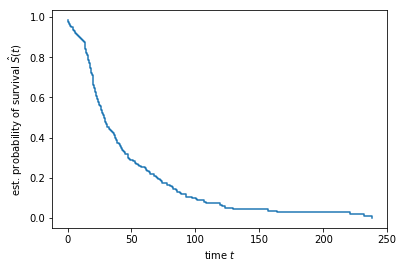

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
from sksurv.nonparametric import kaplan_meier_estimator

time, survival_prob = kaplan_meier_estimator(c['Patient\'s Vital Status'], c['Survival '])
plt.step(time, survival_prob, where="post")
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")